## Listing my understanding of the columns

* `ProductName`: Identifies the cosmetic product.
* `CSFId, CSF`: Potentially represent a unique identifier for the product's color, scent, or flavor (CSF).
* `CompanyId, CompanyName`: Identifies the product's manufacturer.
* ``BrandName`: Specifies the product's brand.
* `PrimaryCategoryId, PrimaryCategory`: Categorizes the product into a primary category.
* `SubCategoryId, SubCategory`: Further categorizes the product into a subcategory.
* `CasId, CasNumber`: Unique identifier for chemical ingredients.
* `ChemicalId, ChemicalName`: Identifies the specific chemical ingredient.
* `InitialDateReported`: Date when the product was first reported.
* `MostRecentDateReported`: Date of the most recent report.
* `DiscontinuedDate`: Date when the product was discontinued (if applicable).
* `ChemicalCreatedAt, ChemicalUpdatedAt`: Timestamps related to the chemical ingredient's entry in the database.
* `ChemicalDateRemoved`: Indicates if a chemical was removed from a product (appears to be empty).
* `ChemicalCount`: Number of chemicals reported for the product.

### Understanding the dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
chemicals_in_cosmetics_df = pd.read_csv('interviewtestdataset.csv')

In [3]:
chemicals_in_cosmetics_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
chemicals_in_cosmetics_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [48]:
chemicals_in_cosmetics_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


* `CSFId`: wide range of values with a high standard deviation. It indicates a large number of unique CSF identifiers and significant variability in their distribution.
* `ChemicalCount`: This column, indicating the number of chemicals reported for each product, has an interesting distribution.
    * The mean (1.288359) is slightly higher than the median (1.000000), suggesting a slight right skew.
    * The maximum value of 9 indicates some products have many reported chemicals.
    * The 75th percentile being 1 suggests that most products have only a few reported chemicals.

In [49]:
chemicals_in_cosmetics_df.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34398
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [50]:
chemicals_in_cosmetics_df.nunique()

CDPHId                    36972
ProductName               33716
CSFId                     58167
CSF                       34326
CompanyId                   635
CompanyName                 606
BrandName                  2713
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       134
CasNumber                   125
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

In [52]:
round(chemicals_in_cosmetics_df.isnull().sum() / chemicals_in_cosmetics_df.shape[0] * 100, 2)

CDPHId                     0.00
ProductName                0.00
CSFId                     29.64
CSF                       30.01
CompanyId                  0.00
CompanyName                0.00
BrandName                  0.20
PrimaryCategoryId          0.00
PrimaryCategory            0.00
SubCategoryId              0.00
SubCategory                0.00
CasId                      0.00
CasNumber                  5.65
ChemicalId                 0.00
ChemicalName               0.00
InitialDateReported        0.00
MostRecentDateReported     0.00
DiscontinuedDate          88.73
ChemicalCreatedAt          0.00
ChemicalUpdatedAt          0.00
ChemicalDateRemoved       97.40
ChemicalCount              0.00
dtype: float64

### 1.2 Diving deep into the columns

#### ProductName

In [6]:
chemicals_in_cosmetics_df['ProductName'].nunique()

33716

In [7]:
chemicals_in_cosmetics_df['ProductName'].value_counts()

ProductName
Eyecolor                                                  766
Nail Lacquer                                              667
BLACK LABEL LIPSTICK                                      487
NYX GIRLS NAIL POLISH                                     462
ROUND LIPSTICK                                            427
                                                         ... 
Thyme, Milk & Lemon Verbena Bath Cream                      1
Shimmery color palette                                      1
Clear mascara                                               1
Intense kohl duo                                            1
OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE BAR SOAP      1
Name: count, Length: 33716, dtype: int64

#### CompanyName

In [9]:
chemicals_in_cosmetics_df.CompanyName.nunique()

606

In [10]:
chemicals_in_cosmetics_df.CompanyName.value_counts()

CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
                                       ... 
Hada S.A.                                 1
LES SALONS DU PALAIS ROYAL SHISEIDO       1
Tupperware U.S., Inc.                     1
OSEA Malibu                               1
Turquise Global LLC                       1
Name: count, Length: 606, dtype: int64

#### BrandName

In [11]:
chemicals_in_cosmetics_df['BrandName'].nunique()

2713

In [12]:
chemicals_in_cosmetics_df['BrandName'].value_counts()

BrandName
SEPHORA               3394
NYX                   3227
bareMinerals          3158
Charlotte Tilbury     2453
Revlon                2335
                      ... 
Ayur SPF 30              1
Sears                    1
53 Elegant Rubin         1
Yoanna Warm Sunset       1
Ruby Kisses              1
Name: count, Length: 2713, dtype: int64

### PrimaryCategory

In [13]:
chemicals_in_cosmetics_df['PrimaryCategory'].nunique()

13

In [14]:
chemicals_in_cosmetics_df['PrimaryCategory'].value_counts()

PrimaryCategory
Makeup Products (non-permanent)      75827
Nail Products                        15347
Skin Care Products                    7683
Sun-Related Products                  4939
Bath Products                         3466
Hair Coloring Products                2061
Hair Care Products (non-coloring)     1620
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             654
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: count, dtype: int64

### SubCategory

In [15]:
chemicals_in_cosmetics_df['SubCategory'].nunique()

89

In [16]:
chemicals_in_cosmetics_df['SubCategory'].value_counts()

SubCategory
Lip Color - Lipsticks, Liners, and Pencils          16555
Eye Shadow                                          15744
Foundations and Bases                               14096
Nail Polish and Enamel                               9945
Lip Gloss/Shine                                      8972
                                                    ...  
Feminine Deodorants                                     3
Antiperspirants (making a cosmetic claim)               3
Lubricants  (e.g. personal, sexual, massage oil)        3
Other Oral Hygiene Product                              3
Other Baby Products                                     2
Name: count, Length: 89, dtype: int64

#### CasNumber

In [17]:
chemicals_in_cosmetics_df['CasNumber'].nunique()

125

In [18]:
chemicals_in_cosmetics_df['CasNumber'].value_counts()

CasNumber
13463-67-7      93049
79-81-2          2288
1333-86-4        2191
12001-26-2       1919
25013-16-5       1888
                ...  
11103-57-538        1
CAS#79-81-2         1
52-01-7             1
101--54-2           1
101-54-2            1
Name: count, Length: 125, dtype: int64

#### ChemicalId

In [8]:
chemicals_in_cosmetics_df['ChemicalId'].nunique()

58079

#### ChemicalName

In [19]:
chemicals_in_cosmetics_df['ChemicalName'].value_counts()

ChemicalName
Titanium dioxide                                                                                       93480
Silica, crystalline (airborne particles of respirable size)                                             2817
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extrac

In [20]:
chemicals_in_cosmetics_df['ChemicalName'].nunique()


123

In [74]:
chemicals_in_cosmetics_df['CDPHId'].nunique()

36972

#### DiscontinuedDate

In [21]:
chemicals_in_cosmetics_df['DiscontinuedDate'].isnull().sum()

np.int64(101715)

### ChemicalDateRemoved

* The number of chemicals being equal to zero suggests that the chemicals were removed from the product (reported in 'ChemicalDateRemoved'). This can be verified by checking if there are NaN values in this column.

In [23]:
chemicals_in_cosmetics_df['ChemicalDateRemoved']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
114630    NaN
114631    NaN
114632    NaN
114633    NaN
114634    NaN
Name: ChemicalDateRemoved, Length: 114635, dtype: object

In [22]:
chemicals_in_cosmetics_df['ChemicalDateRemoved'].isnull().sum()

np.int64(111650)

In [24]:
# when the result is False, there are no NaN values
chemicals_in_cosmetics_df.loc[chemicals_in_cosmetics_df.ChemicalCount==0]['ChemicalDateRemoved'].isnull().max()

np.False_

**INITIAL OBSERVATIONS**


-  A product may appear more than once in the data set if a product has more than one Color/Scent/Flavor, more than one Category, or more than one Chemical Name/CAS number reported.

- CPHId & productname unique counts are different - find out why

- CSF&CSFId, from looking at the data set CSFId and CSF unique counts are different because csf sometimes are general name. For example 0, black, etc, which and be the same for other brands but shouldnt be a problem for now

- Company Id and Company Name counts are different - find out why, need to choose which one to go by
- There are 592 unique company names - if choose to use company name, should standardize first

### 2. Data Preprocessing and Cleaning

In [76]:
chemicals_in_cosmetics_df['InitialDateReported'] = chemicals_in_cosmetics_df['InitialDateReported'].astype('datetime64[ns]')
chemicals_in_cosmetics_df['MostRecentDateReported'] = chemicals_in_cosmetics_df['MostRecentDateReported'].astype('datetime64[ns]')
chemicals_in_cosmetics_df['DiscontinuedDate'] = chemicals_in_cosmetics_df['DiscontinuedDate'].astype('datetime64[ns]')
chemicals_in_cosmetics_df['ChemicalCreatedAt'] = chemicals_in_cosmetics_df['ChemicalCreatedAt'].astype('datetime64[ns]')
chemicals_in_cosmetics_df['ChemicalUpdatedAt'] = chemicals_in_cosmetics_df['ChemicalUpdatedAt'].astype('datetime64[ns]')
chemicals_in_cosmetics_df['ChemicalDateRemoved'] = chemicals_in_cosmetics_df['ChemicalDateRemoved'].astype('datetime64[ns]')
chemicals_in_cosmetics_df['CDPHId'] = chemicals_in_cosmetics_df['CDPHId'].astype('str')
chemicals_in_cosmetics_df['PrimaryCategoryId'] = chemicals_in_cosmetics_df['PrimaryCategoryId'].astype('str')
chemicals_in_cosmetics_df['CompanyId'] = chemicals_in_cosmetics_df['CompanyId'].astype('str')

In [70]:
# Select numeric and categorical columns separately
numeric_columns = chemicals_in_cosmetics_df.select_dtypes(include=['float64', 'int64'])
categorical_columns = chemicals_in_cosmetics_df.select_dtypes(include=['object'])

# Calculate statistics for numeric columns
numeric_statistics = numeric_columns.describe().transpose()
numeric_statistics['average'] = numeric_columns.mean()  # Adding average

# Calculate statistics for categorical columns
categorical_statistics = pd.DataFrame()
for column in categorical_columns.columns:
    categorical_statistics[column] = [categorical_columns[column].value_counts().idxmin(),  # Least frequent value
                                      categorical_columns[column].value_counts().idxmax()]  # Most frequent value
categorical_statistics = categorical_statistics.transpose()
categorical_statistics.columns = ['Least frequent', 'Most frequent']

# Display statistics
print("Numeric Variables Statistics:")
print(numeric_statistics)
print("\nCategorical Variables Statistics:")
print(categorical_statistics)


Numeric Variables Statistics:
                      count          mean           std  min      25%  \
CDPHId             114635.0  20304.858987  12489.052554  2.0   8717.0   
CSFId               80662.0  32608.658377  19089.443910  1.0  15789.0   
CompanyId          114635.0    450.641532    409.533093  4.0     86.0   
PrimaryCategoryId  114635.0     51.076294     20.474341  1.0     44.0   
SubCategoryId      114635.0     66.819252     35.822097  3.0     48.0   
CasId              114635.0    674.094107    149.214101  2.0    656.0   
ChemicalId         114635.0  32837.556959  20439.412299  0.0  13990.0   
ChemicalCount      114635.0      1.288359      0.636418  0.0      1.0   

                       50%       75%      max       average  
CDPHId             20895.0  31338.50  41524.0  20304.858987  
CSFId              32541.0  48717.75  65009.0  32608.658377  
CompanyId            297.0    798.00   1391.0    450.641532  
PrimaryCategoryId     44.0     59.00    111.0     51.076294  
Su

In [ ]:
# chemicals_in_cosmetics_df_N = chemicals_in_cosmetics_df.copy()

In [71]:
chemicals_in_cosmetics_df = chemicals_in_cosmetics_df.drop_duplicates()

In [72]:

# Convert 'CSF' column to numeric
chemicals_in_cosmetics_df['CSF'] = pd.to_numeric(chemicals_in_cosmetics_df['CSF'], errors='coerce')

In [73]:
# Step 1: Identify records with the worst CSF
worst_csf_records = chemicals_in_cosmetics_df[chemicals_in_cosmetics_df['CSF'] == chemicals_in_cosmetics_df['CSF'].min()]

In [ ]:


# Step 2: Determine the most common chemicals among these records
most_common_chemicals = worst_csf_records['ChemicalName'].value_counts().head(5)  # Adjust the number as needed

# Display the most common chemicals associated with the worst CSF
print("Most Common Chemicals Associated with the Worst CSF:")
print(most_common_chemicals)

# Plot bar plot of chemical frequency
plt.figure(figsize=(12, 6))
chemical_freq = df.iloc[:, 19:].sum().sort_values(ascending=False)
chemical_freq.plot(kind='bar', color='skyblue')
plt.xlabel('Chemical Name')
plt.ylabel('Frequency')
plt.title('Frequency of Each Chemical Across all Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Select the top 20 CSF classes
top_20_csf = df['CSF'].value_counts().head(20)

# Plot the distribution of records for the top 20 CSF classes
plt.figure(figsize=(10, 6))
top_20_csf.plot(kind='bar')
plt.xlabel('Cosmetic Safety Factor (CSF)')
plt.ylabel('Number of Records')
plt.title('Distribution of Records for Top 20 CSF Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

# Filter removed products
removed_products = df[df['DiscontinuedDate'].notnull()]

# Convert CSF values to numeric (if not already numeric)
removed_products['CSF'] = pd.to_numeric(removed_products['CSF'], errors='coerce')

# Analyze distribution on CSF
csf_values = removed_products['CSF']
csf_values = csf_values.dropna()  # Drop NaN values
csf_count = len(csf_values)
csf_mean = csf_values.mean()
csf_median = csf_values.median()

print("Number of removed products:", csf_count)
print("Mean CSF:", csf_mean)
print("Median CSF:", csf_median)

# Visualize distribution on CSF
plt.hist(csf_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CSF')
plt.ylabel('Frequency')
plt.title('Distribution of CSF for Removed Products')
plt.show()

# Analyze distribution on the number of chemicals
chemical_count = removed_products['ChemicalCount']
chemical_count_mean = chemical_count.mean()
chemical_count_median = chemical_count.median()

print("Mean number of chemicals:", chemical_count_mean)
print("Median number of chemicals:", chemical_count_median)

# Visualize distribution on the number of chemicals
plt.hist(chemical_count, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Chemicals')
plt.ylabel('Frequency')
plt.title('Distribution of Chemicals for Removed Products')
plt.show()

In [ ]:
# Plot cosmetic products with 5 or more chemicals
above_five = df[df['ChemicalCount'] >= 5]
sorted_df = above_five.sort_values(by='ChemicalCount', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(sorted_df['ProductName'], sorted_df['ChemicalCount'], color='skyblue')
plt.xlabel("Number of Chemicals used")
plt.title("Cosmetic Products with 5 or more toxic chemicals")
plt.tight_layout()
plt.show()

# Average chemicals per brand
average_chemicals_per_brand = df.groupby('BrandName')['ChemicalCount'].mean().reset_index()
average_chemicals_per_brand = average_chemicals_per_brand[average_chemicals_per_brand["ChemicalCount"] >= 3]
average_chemicals_per_brand = average_chemicals_per_brand.sort_values(by='ChemicalCount', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(average_chemicals_per_brand['BrandName'], average_chemicals_per_brand['ChemicalCount'], color='lightgreen')
plt.xlabel("Average number of Chemicals used")
plt.title("Cosmetic Brands with 3 or more average number of toxic chemicals used")
plt.tight_layout()
plt.show()

# Average chemicals per company
average_chemicals_per_company = df.groupby('CompanyName')['ChemicalCount'].mean().reset_index()
average_chemicals_per_company = average_chemicals_per_company[average_chemicals_per_company["ChemicalCount"] >= 3]
average_chemicals_per_company = average_chemicals_per_company.sort_values(by='ChemicalCount', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(average_chemicals_per_company['CompanyName'], average_chemicals_per_company['ChemicalCount'], color='coral')
plt.xlabel("Average number of Chemicals used")
plt.title("Cosmetic Companies with 3 or more average number of toxic chemicals used")
plt.tight_layout()
plt.show()

# Top 10 reported chemicals
plt.figure(figsize=[14, 8])
top_chemicals = (df[df['ChemicalCount'] > 0]['ChemicalName'].value_counts(normalize=True) * 100)[:10]
top_chemicals.plot(kind='bar', color='green')

plt.ylabel('Percentage')
plt.xlabel('Chemical Name')
plt.title('Top 10 Reported Chemicals', color='blue')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# Companies with the highest number of products
df['ProductCount'] = df.groupby('CompanyName')['ProductName'].transform('count')
no_of_products_per_company = df[df["ProductCount"] >= 4000]

plt.figure(figsize=(12, 8))
no_of_products_per_company.groupby('CompanyName').size().plot(kind='barh', color='orchid')
plt.title("Cosmetic Companies with highest number of products")
plt.show()

# Brands with the highest number of products
df['ProductCount_Brand'] = df.groupby('BrandName')['ProductName'].transform('count')
no_of_products_per_brand = df[df["ProductCount_Brand"] >= 3000]

plt.figure(figsize=(12, 8))
no_of_products_per_brand.groupby('BrandName').size().plot(kind='barh', color='salmon')
plt.title("Brand names with highest number of products")
plt.show()

# Primary categories with 5 or more chemicals
df['Primary_Count'] = df.groupby('PrimaryCategory')['PrimaryCategory'].transform('count')
sorted_df = df.sort_values(by='Primary_Count', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(sorted_df['PrimaryCategory'], sorted_df['Primary_Count'], color='turquoise')
plt.xlabel("Number of Products")
plt.title("Primary Categories with 5 or more toxic chemicals")
plt.tight_layout()
plt.show()

# Chemical count statistics
min_chemical_count = df['ChemicalCount'].min()
max_chemical_count = df['ChemicalCount'].max()
average_chemical_count = df['ChemicalCount'].mean()

print("Minimum Chemical Count:", min_chemical_count)
print("Maximum Chemical Count:", max_chemical_count)
print("Average Chemical Count:", average_chemical_count)

# Convert date columns to datetime format
df['ChemicalCreatedAt'] = pd.to_datetime(df['ChemicalCreatedAt'], errors='coerce')
df['ChemicalUpdatedAt'] = pd.to_datetime(df['ChemicalUpdatedAt'], errors='coerce')
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'], errors='coerce')

# Find minimum and maximum dates
min_chemical_created = df['ChemicalCreatedAt'].min()
max_chemical_created = df['ChemicalCreatedAt'].max()
min_chemical_updated = df['ChemicalUpdatedAt'].min()
max_chemical_updated = df['ChemicalUpdatedAt'].max()
min_chemical_removed = df['ChemicalDateRemoved'].min()
max_chemical_removed = df['ChemicalDateRemoved'].max()

print("Minimum Chemical Creation Date:", min_chemical_created)
print("Maximum Chemical Creation Date:", max_chemical_created)
print("Minimum Chemical Update Date:", min_chemical_updated)
print("Maximum Chemical Update Date:", max_chemical_updated)
print("Minimum Chemical Removal Date:", min_chemical_removed)
print("Maximum Chemical Removal Date:", max_chemical_removed)

# Count occurrences of each primary category and subcategory
primary_category_counts = df['PrimaryCategory'].value_counts()
subcategory_counts = df['SubCategory'].value_counts()

# Plot correlation matrix heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Distribution of primary categories
plt.figure(figsize=(10, 6))
primary_category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Primary Category')
plt.ylabel('Number of Records')
plt.title('Distribution of Records in Primary Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of top 10 subcategories
top_subcategories = subcategory_counts.head(10)

plt.figure(figsize=(10, 6))
top_subcategories.plot(kind='bar', color='lightcoral')
plt.xlabel('Subcategory')
plt.ylabel('Number of Records')
plt.title('Distribution of Top 10 Subcategories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Groupby and Aggregate: Use df.groupby() to group by ProductName or ChemicalId and calculate aggregate statistics (e.g., average ChemicalCount, earliest and latest reporting dates) to understand relationships.
Crosstabs: pd.crosstab(df['ProductName'], df['ChemicalId']) creates a frequency table showing the presence of chemicals in different products.

### 3.EDA

In [68]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]  # Pick columns with between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Ensuring nGraphRow is an integer
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

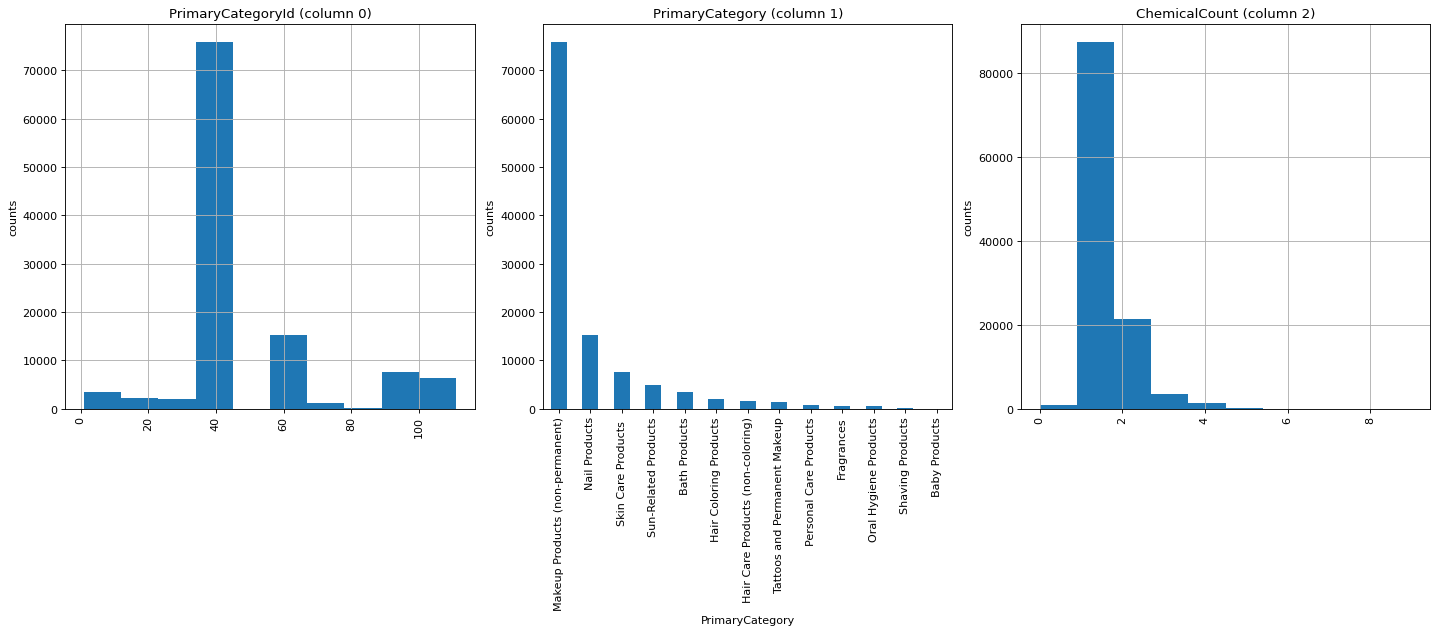

In [69]:
plotPerColumnDistribution(chemicals_in_cosmetics_df, 10, 5)

(array([1.00537e+05, 6.50500e+03, 3.51000e+03, 2.53100e+03, 1.32000e+02,
        5.48000e+02, 9.10000e+01, 4.50000e+02, 2.85000e+02, 4.60000e+01]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

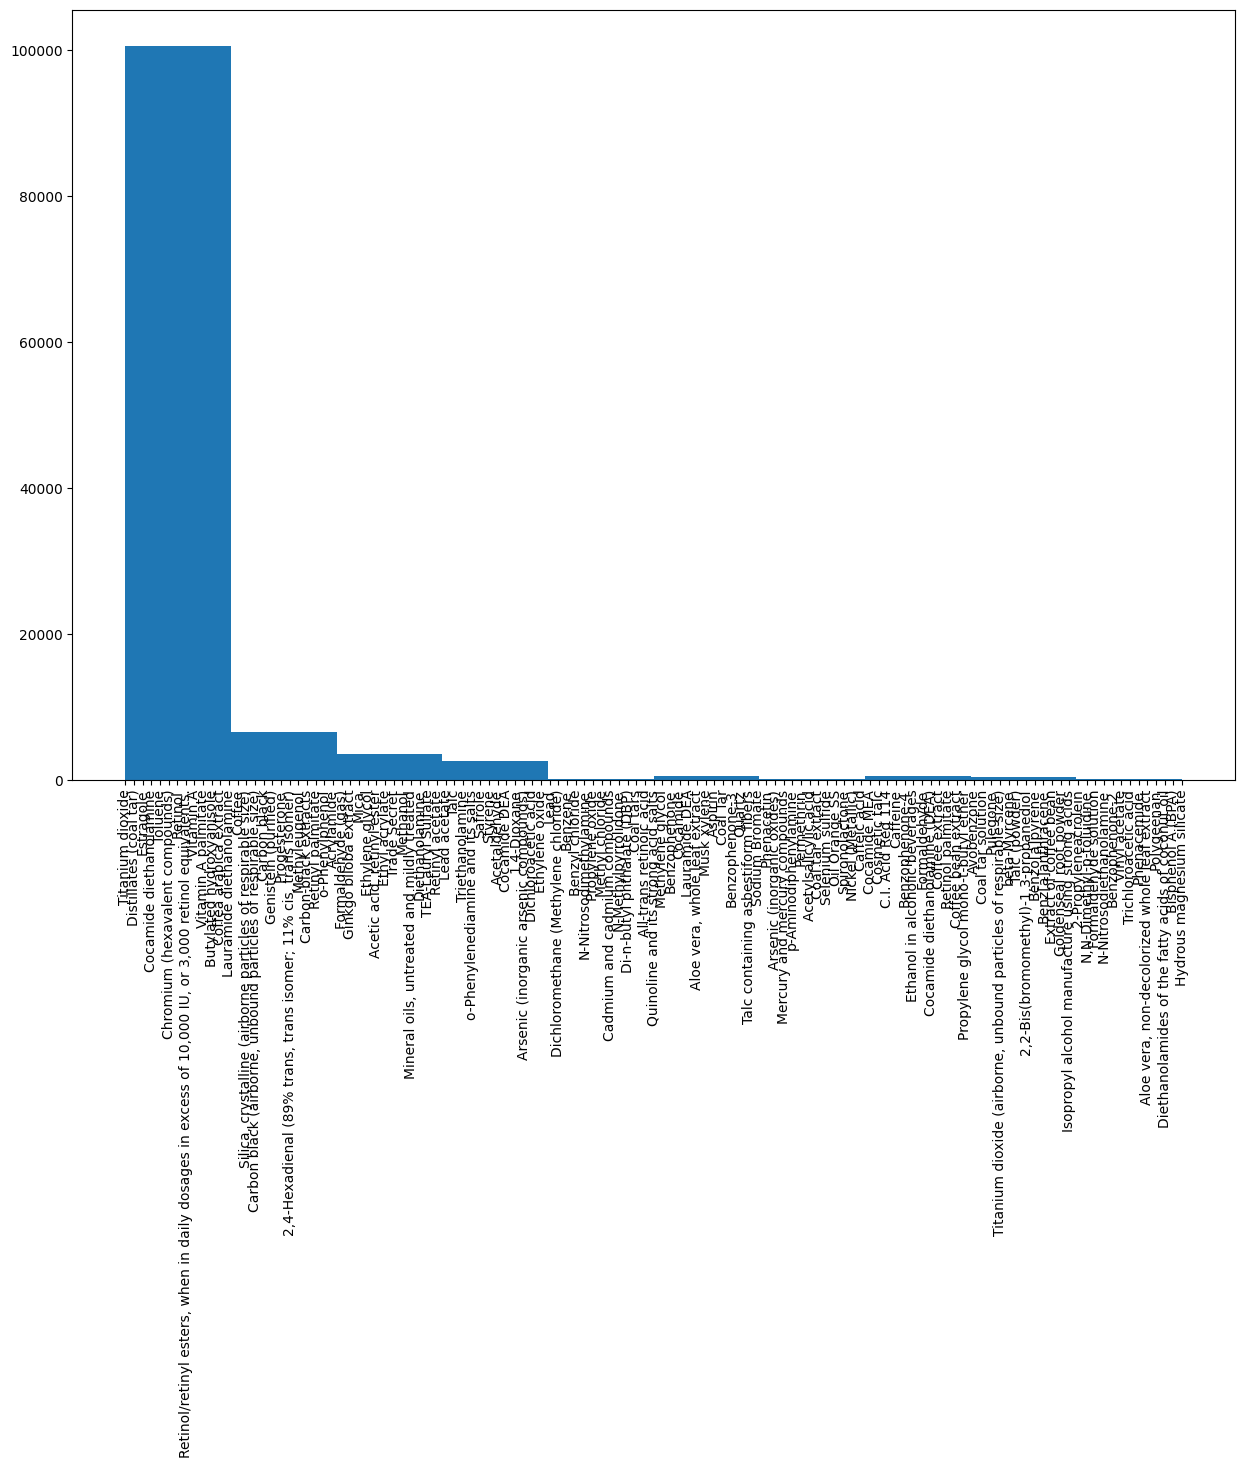

In [54]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=90)
plt.hist(chemicals_in_cosmetics_df['ChemicalName'])

<Axes: ylabel='ChemicalCount'>

<Figure size 2000x3000 with 0 Axes>

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1118f12d0>>
Traceback (most recent call last):
  File "/Users/mowlanica.billa/.pyenv/versions/3.11.5/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


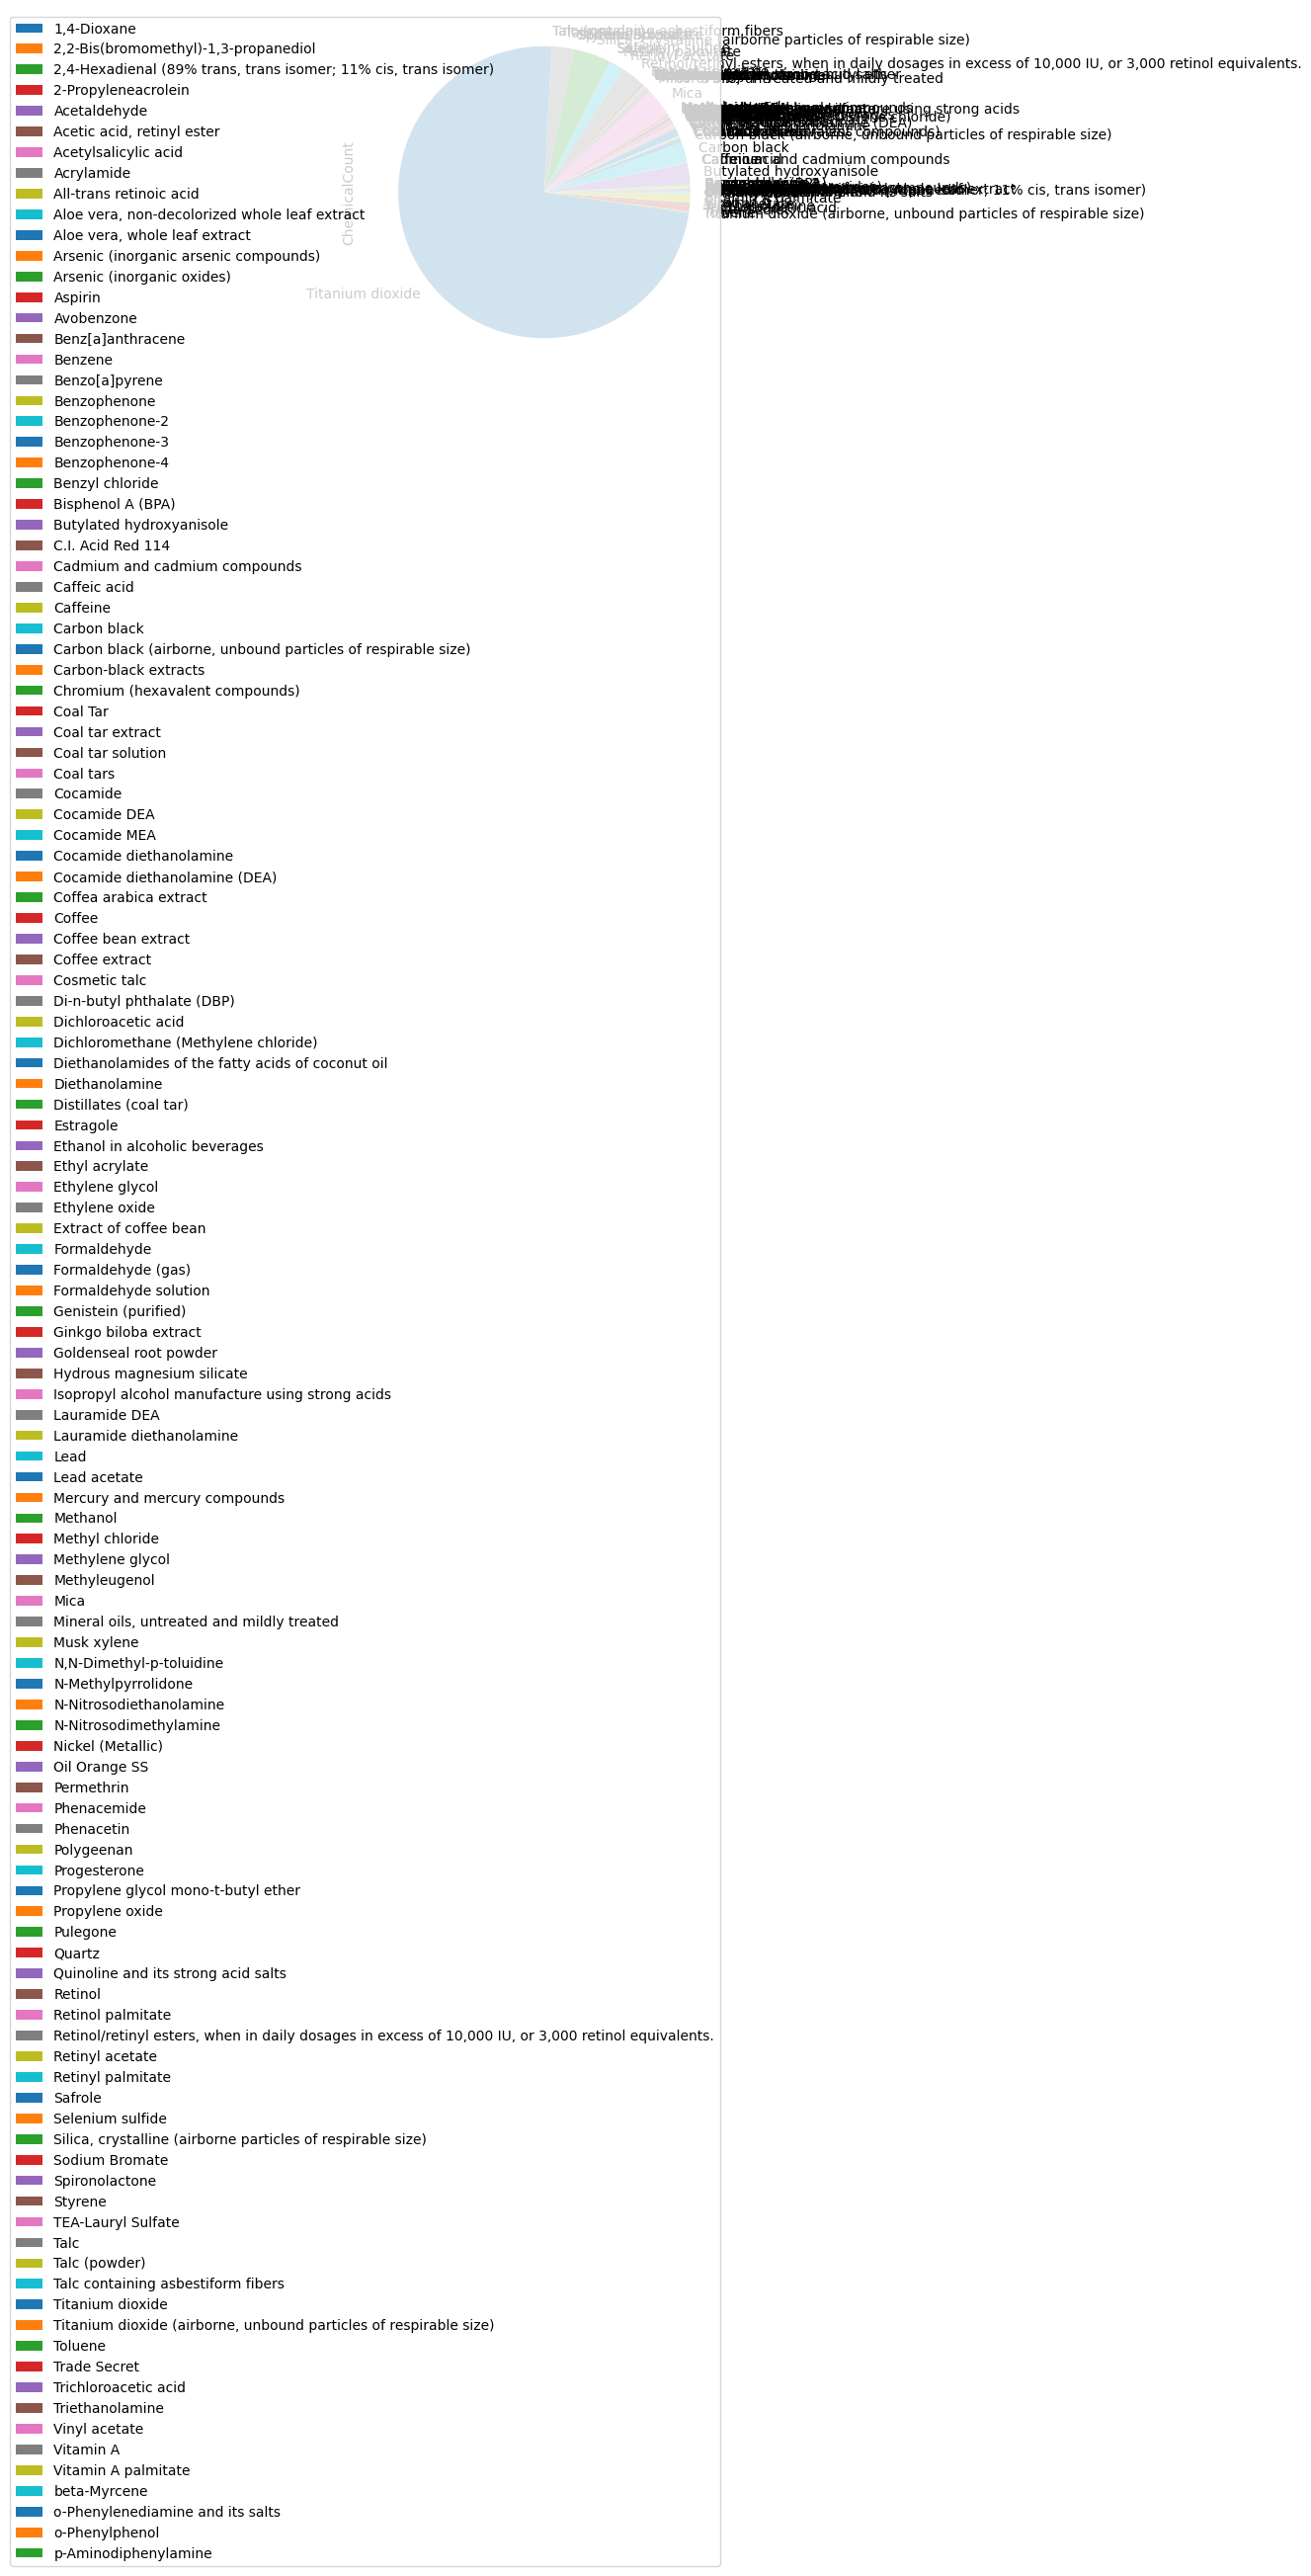

In [57]:
plt.figure(figsize = (20,30))
chemicals_in_cosmetics_df.groupby(['ChemicalName']).sum().plot(kind='pie', y='ChemicalCount')

In [58]:
chemicals_in_cosmetics_df['ChemicalName'].value_counts().size

123

In [59]:
chemicals_in_cosmetics_df.loc[chemicals_in_cosmetics_df.ChemicalCount==0]['ChemicalDateRemoved'].isnull().max()

np.False_

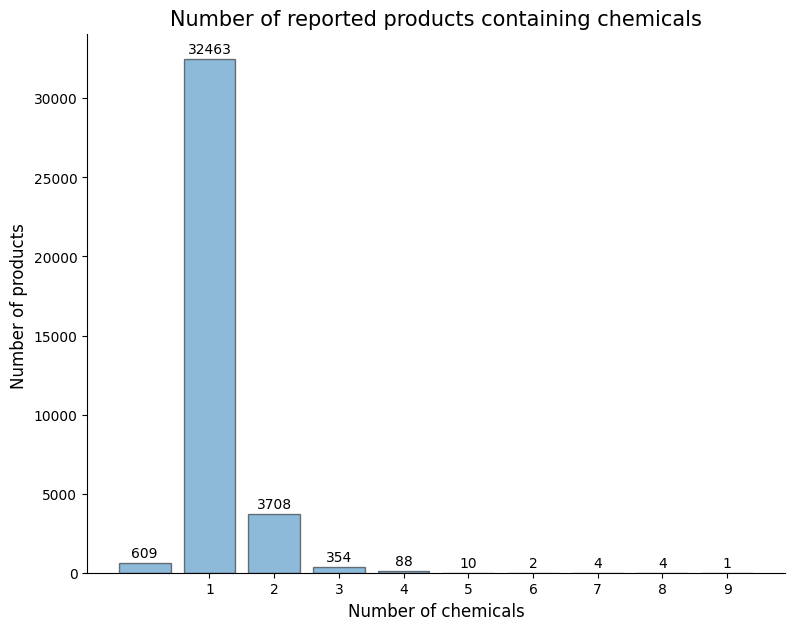

In [60]:
chemical_count_by_ID = chemicals_in_cosmetics_df.groupby(['ChemicalCount']).nunique()['CDPHId']

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.bar(chemical_count_by_ID.index, chemical_count_by_ID.values, align='center', alpha=0.5, edgecolor='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1,10))

for x,y in zip(chemical_count_by_ID.index,chemical_count_by_ID.values):
    plt.annotate(y, (x,y), textcoords="offset points", xytext=(0,4), ha='center') 

ax.set_title('Number of reported products containing chemicals', fontsize=15)
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Number of chemicals', fontsize=12)
ax.set_ylabel('Number of products ', fontsize=12)

plt.show()

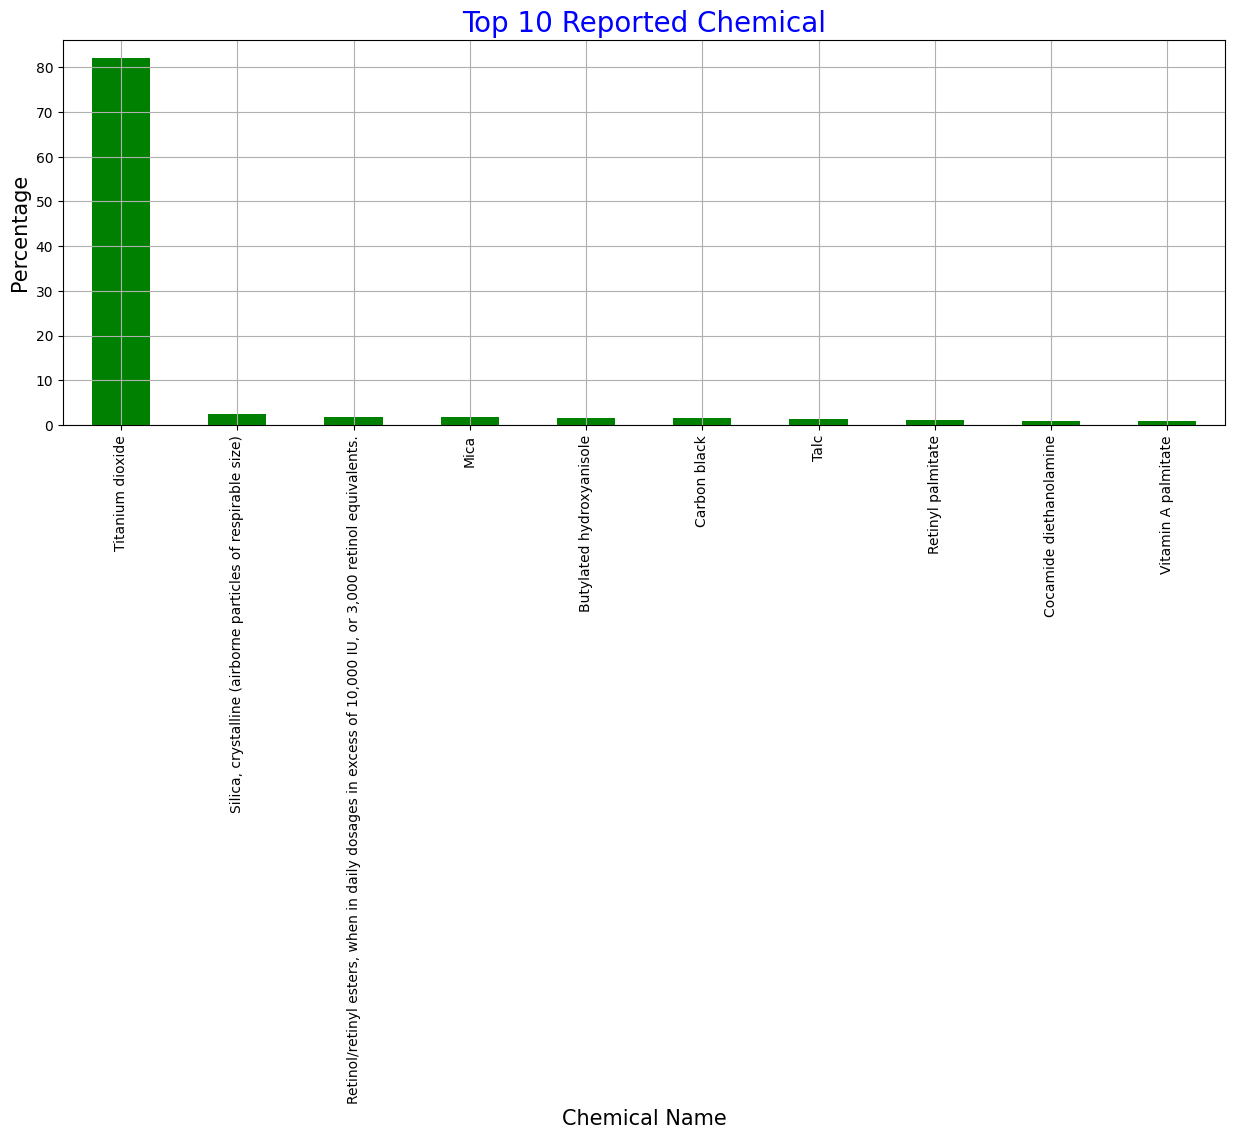

In [61]:
plt.figure(figsize=[15,5])
(chemicals_in_cosmetics_df[chemicals_in_cosmetics_df.ChemicalCount > 0]['ChemicalName'].value_counts(normalize=True) * 100)[:10].plot(kind='bar', color='green')

plt.ylabel('Percentage', fontdict={'size':15})
plt.xlabel('Chemical Name', fontdict={'size':15})
plt.title('Top 10 Reported Chemical', fontdict={'size':20, 'color':'blue'})

plt.grid()
plt.show()

In [62]:
chemicals_in_cosmetics_df['PrimaryCategory'].value_counts()

PrimaryCategory
Makeup Products (non-permanent)      75827
Nail Products                        15347
Skin Care Products                    7683
Sun-Related Products                  4939
Bath Products                         3466
Hair Coloring Products                2061
Hair Care Products (non-coloring)     1620
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             654
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: count, dtype: int64

/var/folders/bk/1644ckzd4z1_dg2l6_nrn3cr0000gp/T/ipykernel_1691/1944083203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=chemicals_in_cosmetics_df['PrimaryCategory'].value_counts(normalize=True) * 100,


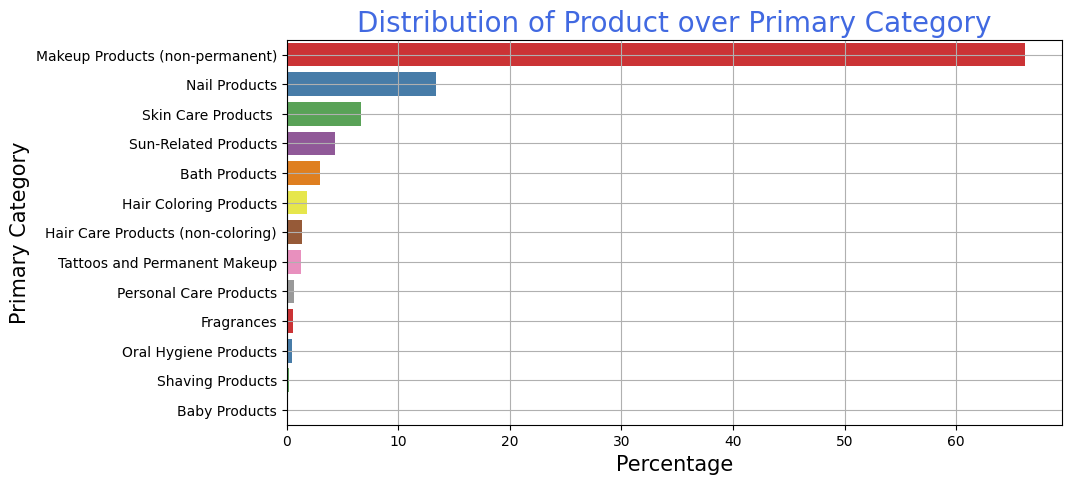

In [63]:
plt.figure(figsize=[10,5])
sn.barplot(x=chemicals_in_cosmetics_df['PrimaryCategory'].value_counts(normalize=True) * 100,
            y=chemicals_in_cosmetics_df['PrimaryCategory'].value_counts().index, palette='Set1')

plt.xlabel('Percentage', fontdict={'size':15})
plt.ylabel('Primary Category', fontdict={'size':15})
plt.title('Distribution of Product over Primary Category', fontdict={'size':20, 'color':'royalblue'})
plt.grid()
plt.show()

## 4. Key Insights

* Finding the products based on the chemical count and discontinued date

In [25]:
chemicals_in_cosmetics_df.loc[(chemicals_in_cosmetics_df.ChemicalCount>0) & (chemicals_in_cosmetics_df['DiscontinuedDate'].isna())]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [27]:
chemicals_in_cosmetics_df.ChemicalCount.max()

np.int64(9)

* The maximum number of chemicals that is reported in a product is 9. We can find these products:

In [28]:
most_chemical_prod = chemicals_in_cosmetics_df.loc[(chemicals_in_cosmetics_df.ChemicalCount>0) & (chemicals_in_cosmetics_df['DiscontinuedDate'].isna())]

In [29]:
most_chemical_prod.loc[chemicals_in_cosmetics_df.ChemicalCount==9]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,33796,"1,4-Dioxane",02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60820,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-06-1,33797,Acrylamide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33798,Arsenic (inorganic arsenic compounds),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-43-6,33799,Dichloroacetic acid,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-21-8,33800,Ethylene oxide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60824,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,50-00-0,33801,Formaldehyde (gas),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60825,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,7439-92-1,33802,Lead,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60826,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33803,Cocamide diethanolamine (DEA),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,107-21-1,33804,Ethylene glycol,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9


Only one product, where each chemical is separately reported.

The code below generates a bar chart that displays the distribution of products based on the number of chemicals used in them. While counting the products, variations in color, scent, and flavor are ignored.

In [30]:
most_chemical_prod.loc[chemicals_in_cosmetics_df['CDPHId']==26]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
32,26,Professional Eyeshadow Base,337.0,Beige,27,"CHANEL, INC",CHANEL,44,Makeup Products (non-permanent),48,...,13463-67-7,27,Titanium dioxide,08/10/2009,12/30/2010,NaN,08/10/2009,08/10/2009,NaN,1
33,26,Professional Eyeshadow Base,338.0,Bright,27,"CHANEL, INC",CHANEL,44,Makeup Products (non-permanent),48,...,13463-67-7,27,Titanium dioxide,08/10/2009,12/30/2010,NaN,08/10/2009,08/10/2009,NaN,1


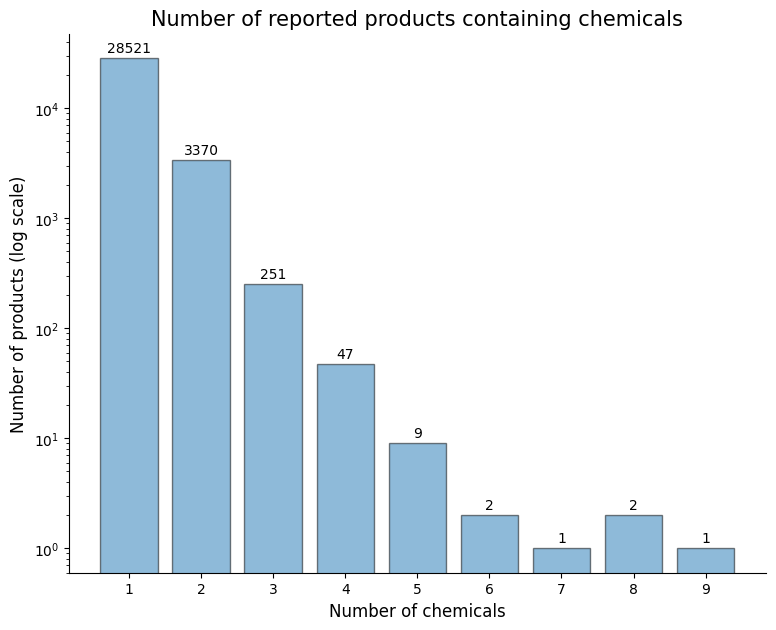

In [36]:
data = most_chemical_prod.groupby(['ChemicalCount']).nunique()['CDPHId']

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.bar(data.index, data.values, log=True, align='center', alpha=0.5, edgecolor='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1,10))

for x,y in zip(data.index,data.values):
    plt.annotate(y, (x,y), textcoords="offset points", xytext=(0,4), ha='center') 

ax.set_title('Number of reported products containing chemicals', fontsize=15)
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Number of chemicals', fontsize=12)
ax.set_ylabel('Number of products (log scale)', fontsize=12)

plt.show()

#### Chemicals in baby products

* Baby products represent one of the primary categories in this dataset.

Lets check if there are any chemicals in Baby products

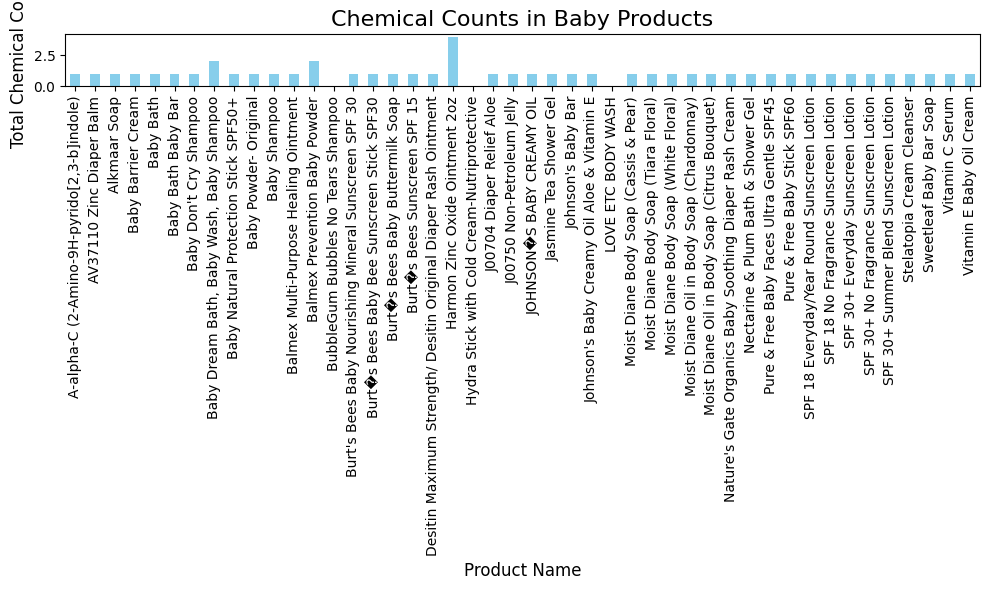

In [41]:
baby_products = chemicals_in_cosmetics_df[chemicals_in_cosmetics_df['PrimaryCategory'].str.contains('Baby', case=False, na=False)]

# Grouping by product name and getting total chemical counts per product
chemical_counts = baby_products.groupby('ProductName')['ChemicalCount'].sum()

# Plotting the data using matplotlib
plt.figure(figsize=(10, 6))
chemical_counts.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Chemical Counts in Baby Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Chemical Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [64]:
print('The chemicals in baby products are:\n\n',baby_products['ChemicalName'].value_counts())

The chemicals in baby products are:

 ChemicalName
Titanium dioxide                                                                                       22
Cocamide diethanolamine                                                                                 5
Cocamide DEA                                                                                            5
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     4
Retinyl palmitate                                                                                       3
Formaldehyde (gas)                                                                                      3
Trade Secret                                                                                            1
Styrene                                                                                                 1
Cadmium and cadmium compounds                                                                        

* The chemical count in baby products is 3 at max

In [42]:
baby_prod = most_chemical_prod.loc[most_chemical_prod['PrimaryCategory']=='Baby Products']
baby_prod.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
14178,3195,Baby Don't Cry Shampoo,22468.0,Fragrance/parfum,174,John Paul Mitchell Systems,John Paul Mitchell Systems,1,Baby Products,3,...,100-42-5,5734,Styrene,10/09/2009,12/30/2010,NaN,10/09/2009,10/09/2009,NaN,1
19139,4654,Harmon Zinc Oxide Ointment 2oz,NaN,NaN,266,Harmon Stores Inc.,Harmon Face Values,1,Baby Products,4,...,7440-43-10,8298,Cadmium and cadmium compounds,10/14/2009,10/14/2009,NaN,10/14/2009,10/14/2009,NaN,2
19140,4654,Harmon Zinc Oxide Ointment 2oz,NaN,NaN,266,Harmon Stores Inc.,Harmon Face Values,1,Baby Products,4,...,7439-92-1,8299,Lead,10/14/2009,10/14/2009,NaN,10/14/2009,10/14/2009,NaN,2
20078,5092,Balmex Multi-Purpose Healing Ointment,NaN,NaN,60,"Chattem, Inc.",Balmex,1,Baby Products,160,...,NaN,8860,"Retinol/retinyl esters, when in daily dosages ...",10/15/2009,08/04/2015,NaN,10/15/2009,08/04/2015,NaN,1
20083,5096,Balmex Prevention Baby Powder,NaN,NaN,60,"Chattem, Inc.",Balmex,1,Baby Products,4,...,NaN,8865,"Retinol/retinyl esters, when in daily dosages ...",10/15/2009,08/04/2015,NaN,10/15/2009,08/04/2015,NaN,1


* Finding all the chemicals listed in the graph

In [43]:
baby_prod_chem = baby_prod['ChemicalName'].value_counts()
print(baby_prod_chem)

ChemicalName
Titanium dioxide                                                                                       16
Cocamide DEA                                                                                            5
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     3
Retinyl palmitate                                                                                       3
Cocamide diethanolamine                                                                                 2
Styrene                                                                                                 1
Cadmium and cadmium compounds                                                                           1
Lead                                                                                                    1
Butylated hydroxyanisole                                                                                1
Acetaldehyde                     

* Replacing `Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.` with `Retinol` for easier representation

In [44]:
long_text = baby_prod_chem.index[2]
print('Old chemical name: ', long_text)
print()
baby_prod_chem.rename({baby_prod_chem.index[2]: 'Retinol *'}, inplace=True)
print('New chemical name: ', baby_prod_chem.index[2])

Old chemical name:  Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.

New chemical name:  Retinol *


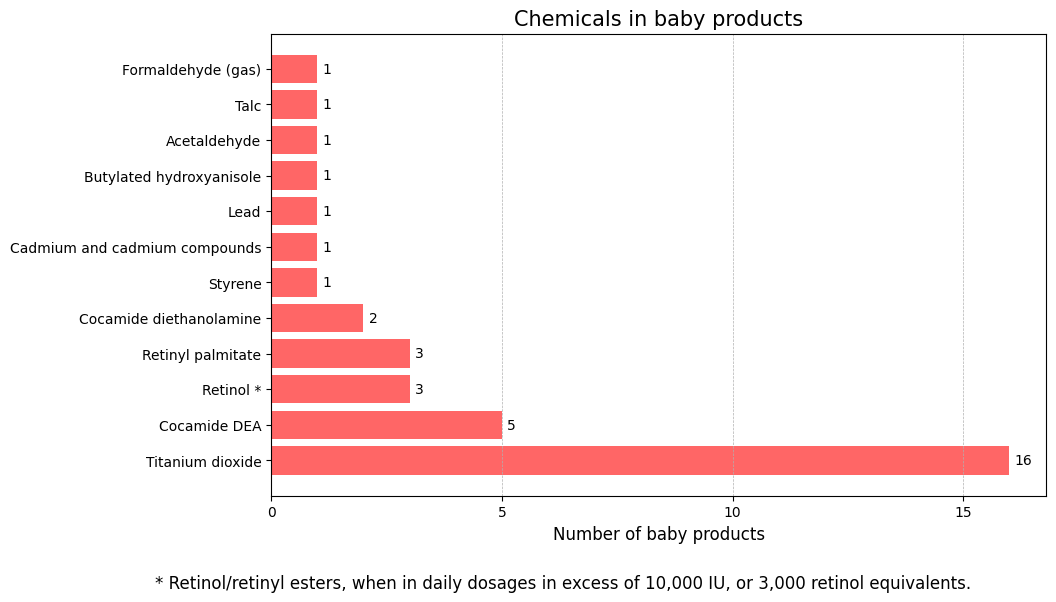

In [45]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.barh(baby_prod_chem.index, baby_prod_chem.values, color='red', alpha=0.6)

ax.xaxis.grid(linestyle='--', linewidth=0.5)

for x,y in zip(baby_prod_chem.values,baby_prod_chem.index):
    ax.annotate(x, (x,y), textcoords="offset points", xytext=(4,0), va='center') 

ax.set_title('Chemicals in baby products', fontsize=15)
ax.title.set_position([0.5,1.02])
ax.set_xlabel('Number of baby products', fontsize=12)
ax.set_xticks(np.arange(0,18,5))
plt.text(-0.15,-0.2, "* "+long_text, size=12, transform=ax.transAxes)

plt.show()

In [47]:
reported_baby_prod = baby_prod[['ProductName', 'CompanyName', 'SubCategory']].sort_values('SubCategory')
reported_baby_prod.columns=['Baby product', 'Company', 'Type of product']
reported_baby_prod.style.hide()

Baby product,Company,Type of product
Baby Don't Cry Shampoo,John Paul Mitchell Systems,Baby Shampoos
"Baby Dream Bath, Baby Wash, Baby Shampoo",Delon Laboratories (1990) Inc,Baby Shampoos
Johnson's Baby Creamy Oil Aloe & Vitamin E,Johnson & Johnson Consumer Companies,Baby Skin Care
Johnson's Baby Bar,Johnson & Johnson Consumer Companies,Baby Skin Care
Vitamin C Serum,"Perfect Angel Cosmetics & Health Co., Limited",Baby Skin Care
Vitamin E Baby Oil Cream,"Vi-Jon, Inc",Baby Skin Care
Burt's Bees Baby Nourishing Mineral Sunscreen SPF 30,Burt's Bees Inc.,Baby Skin Care
Pure & Free Baby Stick SPF60,Johnson & Johnson Consumer Companies,Baby Skin Care
Baby Natural Protection Stick SPF50+,Johnson & Johnson Consumer Companies,Baby Skin Care
Pure & Free Baby Faces Ultra Gentle SPF45,Johnson & Johnson Consumer Companies,Baby Skin Care
